In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import io
import csv
import numpy as np
import pandas as pd
import dask.dataframe as dd
import dask

In [11]:
filename = 'C:/Users/jlim13/Desktop/original.csv'
df = dd.read_csv(filename, dtype='str')

In [12]:
# filter English tweets
df2 = df[df.tweet_language == "en"]

In [14]:
len(df2)

2997181

In [4]:
# extract the column you want
df3 = df2[['tweetid','retweet_tweetid']]
#2997181 rows × 2 columns

In [5]:
df4 = df3.dropna() #drop null rows
#1082867 rows × 2 columns

In [6]:
df4.head()

,tweetid,retweet_tweetid
48,631377234847248384,631210828142931968
95,820207183841337344,820202831726735360
96,845544366579957760,845460210445541376
97,855940331451187201,855934951027552256
98,822200544555110401,822196437438103552


In [7]:
type(df4)

dask.dataframe.core.DataFrame

In [8]:
df5 = df4.compute()

In [23]:
df5.head()

,tweetid,retweet_tweetid
48,631377234847248384,631210828142931968
95,820207183841337344,820202831726735360
96,845544366579957760,845460210445541376
97,855940331451187201,855934951027552256
98,822200544555110401,822196437438103552


In [30]:
df5.to_csv('C:/Users/jlim13/Desktop/ira_final3.csv', index=False)

In [2]:
g = nx.DiGraph()

with io.open('C:/Users/jlim13/Desktop/ira_final3.csv') as file:
    reader = csv.DictReader(file, delimiter=',', quotechar='"')

    # Read lines
    for row in reader:
        tweetid = row["tweetid"]
        retweet_tweetid = row["retweet_tweetid"]
        g.add_edge(tweetid, retweet_tweetid)

print("|V|=%d, |E|=%d" % (g.order(), g.size())) #|V|=1807881, |E|=1082867

|V|=1807881, |E|=1082867


In [21]:
# check number of nodes and edges 
N = len(g.nodes)
print(N)

1807881


In [22]:
E = len(g.edges)
print(E)

1082867


# Degree distribution: helps us understand connectivity trends in networks and how edges are distributed among nodes

In [34]:
degrees = [ x[1] for x in g.degree() ]

In [35]:
# Obtain a histogram; this requires two additional bins
# to the left and right (hence the +2)
prob, bin_edges = np.histogram(degrees, bins=range(1,np.max(degrees)+2), density=True)

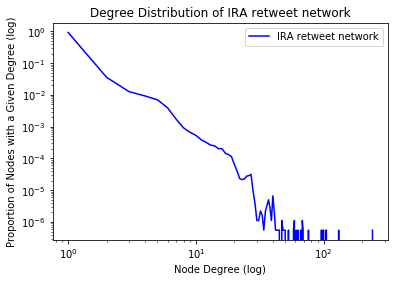

In [45]:
# Plot in log-log the degree distribution with crosses
plt.loglog(bin_edges[:-1], prob, '-', color = 'b', label = 'IRA retweet network')
plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of IRA retweet network')
plt.legend()
plt.show()

In [46]:
def plot_degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.hist(degrees)
    plt.show()

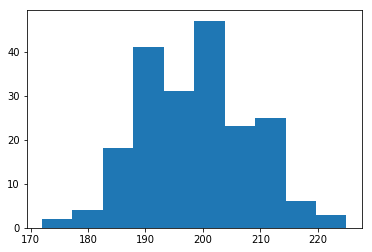

In [49]:
plot_degree_dist(nx.gnp_random_graph(200, 0.5, directed=True))

In [14]:
# calculate average degree of g
degrees2 = [deg for node, deg in nx.degree(g)]
kavg = np.mean(degrees2)
print(kavg)

1.1979405724159942


In [7]:
nx.number_strongly_connected_components(g) #1807881

1807881

In [12]:
nx.number_weakly_connected_components(g) #725014

725014

In [ ]:
nx.diameter(g) #maximum eccentricity

In [82]:
# Use the multi-axes indexing funtion
data4 = data3.loc[:,['tweetid','retweet_tweetid']]
df = data4.dropna()
df.to_csv('C:/Users/jlim13/Desktop/ira4.csv')

In [5]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1807881
Number of edges: 1082867
Average in degree:   0.5990
Average out degree:   0.5990


In [10]:
communities = nx.community.girvan_newman(g)

In [4]:
from networkx.algorithms.community import girvan_newman, modularity
import community   # Louvain method

In [ ]:
# Community detection with the girvan-newman algorithm
commInd_karate = girvan_newman_opt(g)

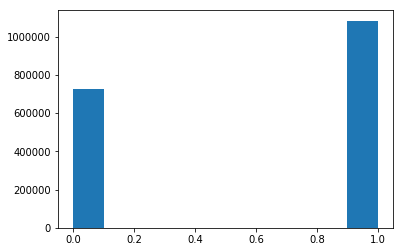

In [5]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(g)

plt.figure()
plt.hist([len(list(g.neighbors(n))) for n in g.nodes()])
plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.show()

In [ ]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(g)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(g)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [4]:
g1 = nx.Graph(g)

In [5]:
import community
part = community.best_partition(g1)

In [15]:
print('Modularity: ', community.modularity(part, g1))

Modularity:  0.9999969111809828


In [6]:
# Keep only communities with a minimum of tweets
centers = {}
communities = {}
g1_main_com = g1.copy()
min_nb = 100
for com in set(part.values()) :
    list_nodes = [nodes for nodes in part.keys() if part[nodes] == com]
    if len(list_nodes) < min_nb:
        g1_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = g1_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        #print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' tweets:')
        print(len(list_nodes))

100
105
106
242
132
101


KeyboardInterrupt: 